In [3]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l
import sys
import os

# Add parent directory to sys.path
sys.path.insert(0, os.path.abspath('..'))

# Now import your module from the parent folder
import utils

In [23]:
n_train, n_test, num_inputs, batch_size = 20,100,200,5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [28]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        # default value is (0,1)
        param.data.normal_()
    loss = nn.MSELoss(reduction = 'none')
    
    # lr is key, change to 0.03 will have total different graph
    num_epochs, lr = 100,0.003
    
    # it tells to use L2 weight decay
    trainer = torch.optim.SGD([{"params":net[0].weight, 'weight_decay':wd}, 
                               {"params":net[0].bias}], lr = lr)
    animator = utils.Animator(xlabel='epochs', ylabel = 'loss', yscale='log',
                              xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            # mean is much better in many cases, because sum() might too huge, it is related to batch_size, while mean 
            # is more stable
            l.mean().backward()
            trainer.step()
        if (epoch+1) % 5 == 0:
            animator.add(epoch+1, (d2l.evaluate_loss(net, train_iter, loss),
                                   d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())


w的L2范数： 14.02773380279541


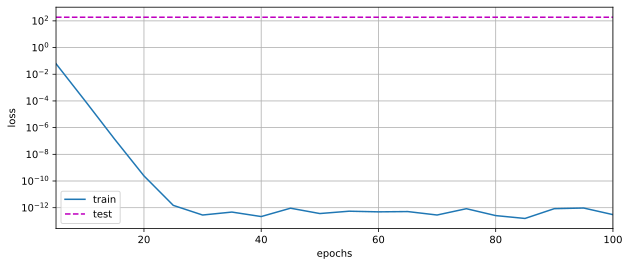

In [25]:
train_concise(0)

w的L2范数： 0.398131787776947


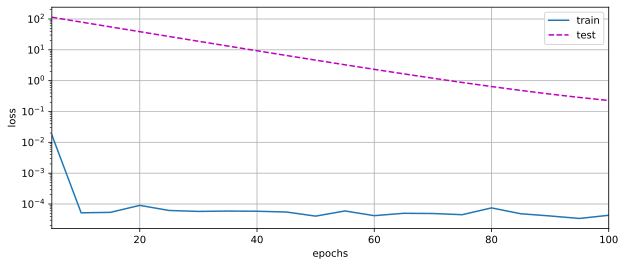

In [26]:
train_concise(3)

w的L2范数： 0.24815364181995392


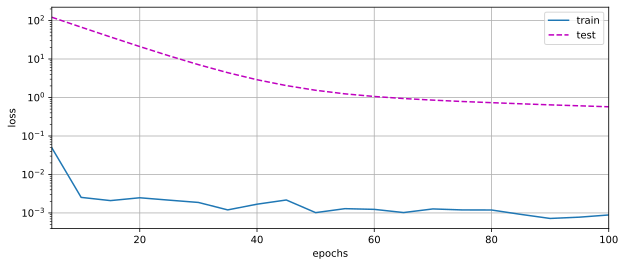

In [27]:
train_concise(5)